<a href="https://colab.research.google.com/github/Piternicolas/Feminicidio-em-Sao-Paulo/blob/main/FEMINIC%C3%8DDIO_EM_S%C3%83O_PAULO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import datetime
import time
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 100

In [ ]:
df = pd.read_csv("feminicidioSP.csv")

In [ ]:
df.DATA_FATO = pd.to_datetime(df.DATA_FATO, format="%m/%d/%Y")
df.DATA_NASCIMENTO_PESSOA = pd.to_datetime(df.DATA_NASCIMENTO_PESSOA, format="%m/%d/%Y")

In [ ]:
print("Colunas do DataFrame:", df.shape[1],"\nEntradas do DataFrame:",df.shape[0])

Colunas do DataFrame: 13 
Entradas do DataFrame: 1060


In [ ]:
df[:3]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
1,Ubatuba,DM - Ubatuba,1,2015-04-18,Area não ocupada,Vítima,Feminino,37.0,1977-07-08,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
2,São Paulo,049 DP - São Mateus,1,2015-04-24,Via pública,Vítima,Feminino,17.0,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
print("Colunas:\n",
      df.dtypes)

Colunas:
 MUNICIPIO_CIRCUNSCRICAO            object
DP_CIRCUNSCRICAO                   object
Nº DE VÍT HD                        int64
DATA_FATO                  datetime64[ns]
DESC_TIPOLOCAL                     object
TIPO_PESSOA                        object
SEXO_PESSOA                        object
IDADE_PESSOA                      float64
DATA_NASCIMENTO_PESSOA     datetime64[ns]
COR_PELE                           object
PROFISSAO                          object
NATUREZA_APURADA                   object
DESDOBRAMENTO                      object
dtype: object


## **Dicionário das colunas:**
* **MUNICIPIO_CIRCUNSCRICAO:** Cidade do estado de São Paulo.
* **DP_CIRCUNSCRICAO:** Departamento de Polícia que foi registrado o boletim de ocorrência.
* **Nº DE VÍT HD**: Número de vítimas.
* **DATA_FATO:** Data que ocorreu o crime.
* **DESC_TIPOLOCAL:** Descrição do local onde ocorreu o crime.
* **TIPO_PESSOA:** Vítima do crime.
* **SEXO_PESSOA:** Sexo da vítima:
* **IDADE_PESSOA:** Idade da vítima.
* **DATA_NASCIMENTO_PESSOA:** Data de nascimento da vítima.
* **COR_PELE:** Cor da pele da vítima.
* **PROFISSAO:** Profissão da vítima.
* **NATUREZA_APURADA:** Natureza do crime.
* **DESDOBRAMENTO:** Especificação do crime.

In [ ]:
df.TIPO_PESSOA.value_counts()

Vítima                  1057
Autor/Vitima               1
Encontro de Cadáver        1
Vítima                     1
Name: TIPO_PESSOA, dtype: int64

In [ ]:
df.SEXO_PESSOA.value_counts()

Feminino     1057
Masculino       3
Name: SEXO_PESSOA, dtype: int64

In [ ]:
df.NATUREZA_APURADA.value_counts()

HOMICÍDIO DOLOSO    1060
Name: NATUREZA_APURADA, dtype: int64

In [ ]:
df.DESDOBRAMENTO.value_counts()

Feminicídio-contra a mulher por razões da condição de sexo feminino                1058
A pena do feminicídio é aumentada de 1/3 (um terço) até a metade se o crime for       2
Name: DESDOBRAMENTO, dtype: int64

## **Observações:**
* A coluna **TIPO_PESSOA** tem 4 tipos de entradas diferentes, vou eliminar duas que não fazem sentido para trabalhar os dados.
* Na coluna **SEXO_PESSOA** há 3 entradas para o sexo MASCULINO, vou excluir pois quero trabalhar somente com os registros de mulheres pois esse projeto se trata de feminicídio.
* A coluna **DESDOBRAMENTO** há 2 entradas diferentes, mais a frente vou investigar.

## **Exclusão de entradas dispensáveis**



In [ ]:
df.loc[df.SEXO_PESSOA == 'Masculino']

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
382,Praia Grande,002 DP - Praia Grande,1,2019-02-13,Residência,Vítima,Masculino,36.0,1982-10-28,Parda,CABELEIREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
672,Ibitinga,DM - Ibitinga,1,2020-10-05,Residência,Vítima,Masculino,17.0,2002-12-11,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
844,Catanduva,003 DP - Catanduva,1,2021-11-06,Comércio e serviços,Vítima,Masculino,32.0,1989-06-03,Parda,ARTISTA,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
df = df.drop((df.loc[df.SEXO_PESSOA == 'Masculino']).index)

In [ ]:
df.loc[df.TIPO_PESSOA == 'Autor/Vitima']

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
205,São Paulo,010 DP - Penha de França,1,2017-11-07,Via pública,Autor/Vitima,Feminino,33.0,1984-01-20,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
df.loc[df.TIPO_PESSOA == 'Encontro de Cadáver']

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
899,Serra Negra,DM - Serra Negra,1,2022-03-08,Area não ocupada,Encontro de Cadáver,Feminino,34.0,1987-09-12,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
df = df.drop((df.loc[df.TIPO_PESSOA =='Autor/Vitima']).index)
df = df.drop((df.loc[df.TIPO_PESSOA =='Encontro de Cadáver']).index)

In [ ]:
df.shape[0]

1055

In [ ]:
df[:5]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
1,Ubatuba,DM - Ubatuba,1,2015-04-18,Area não ocupada,Vítima,Feminino,37.0,1977-07-08,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
2,São Paulo,049 DP - São Mateus,1,2015-04-24,Via pública,Vítima,Feminino,17.0,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
3,Viradouro,DM - Viradouro,1,2015-04-26,Residência,Vítima,Feminino,54.0,1960-06-11,Parda,FAXINEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
4,Carapicuíba,002 DP - Carapicuiba,1,2015-05-03,Residência,Vítima,Feminino,23.0,1991-05-25,Preta,OPERADOR(A) TELEMARKETING,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
print("Entradas após limpeza:",df.shape[0])

Entradas após limpeza: 1055


* Excluí cerca **0,5%** dos dados.

### **Abaixo vou tratar as colunas com entradas nulas**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

PROFISSAO                  374
DATA_NASCIMENTO_PESSOA      11
IDADE_PESSOA                 8
MUNICIPIO_CIRCUNSCRICAO      0
DP_CIRCUNSCRICAO             0
Nº DE VÍT HD                 0
DATA_FATO                    0
DESC_TIPOLOCAL               0
TIPO_PESSOA                  0
SEXO_PESSOA                  0
COR_PELE                     0
NATUREZA_APURADA             0
DESDOBRAMENTO                0
dtype: int64

In [ ]:
df[df.IDADE_PESSOA.isnull()]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
44,São Paulo,025 DP - Parelheiros,1,2016-01-31,Area não ocupada,Vítima,Feminino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
118,Suzano,001 DP - Suzano,1,2017-01-24,Serviços e bens públicos,Vítima,Feminino,NaN,NaT,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
146,Franco da Rocha,DM - Franco da Rocha,1,2017-04-16,Residência,Vítima,Feminino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
321,São José dos Campos,006 DP - São Jose dos Campos,1,2018-10-03,Residência,Vítima,Feminino,NaN,NaT,Amarela,COZINHEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
478,Ferraz de Vasconcelos,DM - Ferraz de Vasconcelos,1,2019-09-21,Unidade rural,Vítima,Feminino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
605,Sorocaba,009 DP - Sorocaba,1,2020-04-12,Lazer e recreação,Vítima,Feminino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
690,Cotia,001 DP - Cotia,1,2020-11-07,Residência,Vítima,Feminino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
981,Nova Granada,DM - Nova Granada,1,2022-08-24,Residência,Vítima,Feminino,NaN,NaT,Ignorada,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
df.describe()

,Nº DE VÍT HD,IDADE_PESSOA
count,1055.0,1047.000000
mean,1.0,35.862464
std,0.0,13.751141
min,1.0,1.000000
25%,1.0,26.000000
50%,1.0,34.000000
75%,1.0,43.000000
max,1.0,88.000000


In [ ]:
df = df.drop((df[df.IDADE_PESSOA.isnull()]).index)

* ### Na coluna **IDADE_PESSOA** eu exclui as entradas que estavam nulas e mais para frente vou verificar se há outliers ou valores incorretos.
## Na coluna **PROFISSAO** vou preencher com algum tipo para não excluir as entradas.

In [ ]:
df['PROFISSAO'].fillna('NÃO IDENTIFICADO', inplace=True)

In [ ]:
df.isnull().sum()

MUNICIPIO_CIRCUNSCRICAO    0
DP_CIRCUNSCRICAO           0
Nº DE VÍT HD               0
DATA_FATO                  0
DESC_TIPOLOCAL             0
TIPO_PESSOA                0
SEXO_PESSOA                0
IDADE_PESSOA               0
DATA_NASCIMENTO_PESSOA     3
COR_PELE                   0
PROFISSAO                  0
NATUREZA_APURADA           0
DESDOBRAMENTO              0
dtype: int64

In [ ]:
df[df['DATA_NASCIMENTO_PESSOA'].isnull()]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
81,Itapevi,DM - Itapevi,1,2016-08-14,Residência,Vítima,Feminino,52.0,NaT,Parda,NÃO IDENTIFICADO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
171,Agudos,DM - Agudos,1,2017-08-14,Area não ocupada,Vítima,Feminino,24.0,NaT,Branca,NÃO IDENTIFICADO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino
437,São Paulo,062 DP - Ermelino Matarazzo,1,2019-06-13,Residência,Vítima,Feminino,26.0,NaT,Parda,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


* ## Vou manter a coluna **DATA_NASCIMENTO_PESSOA** com os dados nulos sem preencher pois vou usar apenas para conferir a idade de algumas vítimas.


In [ ]:
print("Começo dos registros:",df['DATA_FATO'].min())
print("Final dos registros",df['DATA_FATO'].max())

Começo dos registros: 2015-04-12 00:00:00
Final dos registros 2022-12-29 00:00:00


* ## Esse DataFrame contém registros entre os dias **12/04/2015** e **29/12/2022**.

In [ ]:
df.IDADE_PESSOA.describe()

count    1047.000000
mean       35.862464
std        13.751141
min         1.000000
25%        26.000000
50%        34.000000
75%        43.000000
max        88.000000
Name: IDADE_PESSOA, dtype: float64

In [ ]:
print("Total de registros:",df.shape[0])
print("Entre 0 e 11 anos:",df[df['IDADE_PESSOA'].between(0,11)].shape[0])
print("Entre 12 e 17 anos:",df[df['IDADE_PESSOA'].between(12,17)].shape[0])
print("Entre 18 e 59 anos:",df[df['IDADE_PESSOA'].between(18,59)].shape[0])
print("Acima de 60 anos:",format(len(df[df.IDADE_PESSOA > 59])))

Total de registros: 1047
Entre 0 e 11 anos: 15
Entre 12 e 17 anos: 35
Entre 18 e 59 anos: 934
Acima de 60 anos: 63


In [ ]:
df.loc[df['IDADE_PESSOA'] == 88]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
529,São Paulo,020 DP - Água Fria,1,2019-12-23,Residência,Vítima,Feminino,88.0,1931-10-26,Preta,PENSIONISTA,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


* ## O caso de feminicídio com a mulher mais velha desse DataFrame envolve uma senhora de **88 anos**, que ocorreu na **Capital** de São Paulo, dia **23/12/2019** em sua residência, era uma mulher **preta** e **pensionista**.

In [ ]:
df.loc[df['IDADE_PESSOA'] == 1]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
890,Penápolis,DM - Penapolis,1,2022-02-14,Residência,Vítima,Feminino,1.0,2020-11-06,Branca,NÃO IDENTIFICADO,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


* ## O caso de feminicídio com a mulher mais nova desse DataFrame envolve um bebê de apenas **1 ano** da cor **branca**, que ocorreu em **Penápolis**, dia **14/02/2022** em uma residência.

In [ ]:
print("Total de registros:",df.shape[0])
print("Entre 0 e 11 anos:",df[df['IDADE_PESSOA'].between(0,11)].shape[0]/df.shape[0]*100,"%")
print("Entre 12 e 17 anos:",df[df['IDADE_PESSOA'].between(12,17)].shape[0]/df.shape[0]*100,"%")
print("Entre 18 e 59 anos:",df[df['IDADE_PESSOA'].between(18,59)].shape[0]/df.shape[0]*100,"%")
print("Acima de 60 anos:",format(len(df[df.IDADE_PESSOA > 59])/df.shape[0]*100),"%")

Total de registros: 1047
Entre 0 e 11 anos: 1.4326647564469914 %
Entre 12 e 17 anos: 3.3428844317096464 %
Entre 18 e 59 anos: 89.207258834766 %
Acima de 60 anos: 6.017191977077363 %


## **Feminicío por faixa etária:**
* #### **TOTAL DE REGISTROS: 1047 óbitos.**
* #### **Entre 0 e 11 anos:** 15 óbitos (**1,4%** dos registros)
* #### **Entre 12 e 17 anos:** 35 óbitos (**3,3%** dos registros)
* #### **Entre 18 e 59 anos:** 934 óbitos (**89,2%** dos registros)
* #### **Acima de 60 anos:** 63 óbitos (**6%** dos registros)

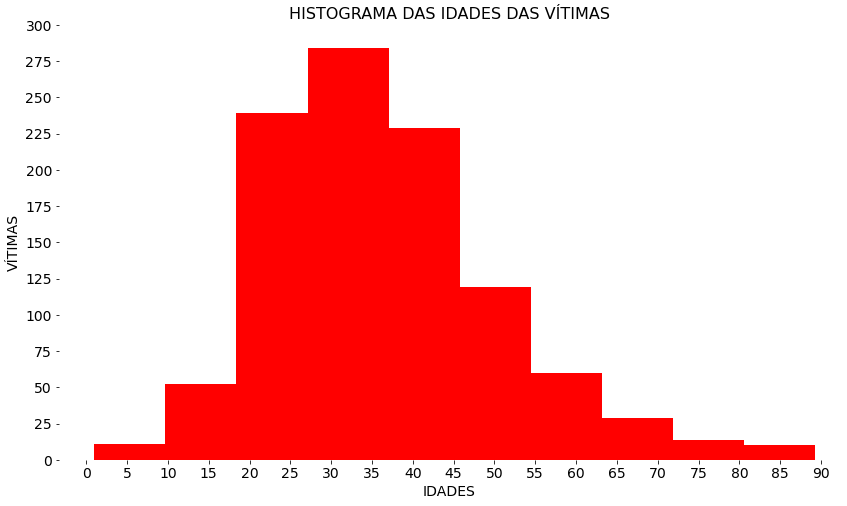

In [ ]:
fig, ax = plt.subplots(figsize=(14,8), dpi=72)

plt.hist(df.IDADE_PESSOA, color='red', width=10)
ax.set_title("HISTOGRAMA DAS IDADES DAS VÍTIMAS", fontsize=16)
ax.set_ylabel('VÍTIMAS', fontsize=14)
ax.set_xlabel('IDADES', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(range(0,91,5))
ax.set_yticks(range(0,301,25))
ax.spines[:].set_visible(False)

plt.show()

* ### Há uma concentração maior de casos entre **18 e 45 anos**.

In [ ]:
df['IDADE_PESSOA'].value_counts().head()/df.shape[0]*100

31.0    3.820439
34.0    3.629417
35.0    3.533906
27.0    3.533906
28.0    3.438395
Name: IDADE_PESSOA, dtype: float64



---



In [ ]:
cor = pd.DataFrame(df.groupby(['COR_PELE']).sum().sort_values(by='Nº DE VÍT HD', ascending=False))

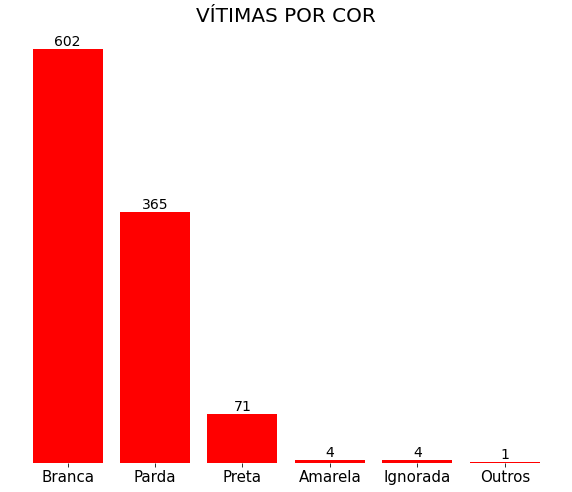

In [ ]:
fig, ax = plt.subplots(figsize=(10,8), dpi=72)

corvit = ax.bar(cor.index, cor['Nº DE VÍT HD'] ,color='red',)
ax.set_title("VÍTIMAS POR COR", fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticks(range(0,601,50))
ax.spines[:].set_visible(False)
ax.bar_label(corvit, fmt='%.f', fontsize=14)
ax.yaxis.set_visible(False)

plt.show()

In [ ]:
cor['Nº DE VÍT HD']/1047*100

COR_PELE
Branca      57.497612
Parda       34.861509
Preta        6.781280
Amarela      0.382044
Ignorada     0.382044
Outros       0.095511
Name: Nº DE VÍT HD, dtype: float64

* ## **Feminicídio por cores:**
* ### **57,5%** dos casos de feminicídio são contra a mulher **branca**.
* ### **34,9%** dos casos de feminicídio são contra a mulher **parda**.
* ### **6,8%** dos casos de feminicídio são contra a mulher **preta**.
* ### **0,8%** dos registros são de mulheres da cor **amarela** e cores não especificadas.



---



In [ ]:
df[:1]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
muni = pd.DataFrame(df.groupby('MUNICIPIO_CIRCUNSCRICAO').sum().sort_values(by='Nº DE VÍT HD', ascending=False))

In [ ]:
mun = muni[:10]

In [ ]:
print("MUNICÍPIOS REGISTRADOS NO DATAFRAME:",df['MUNICIPIO_CIRCUNSCRICAO'].value_counts().shape[0])
print()
mun['Nº DE VÍT HD']/1047*100

MUNICÍPIOS REGISTRADOS NO DATAFRAME: 264



MUNICIPIO_CIRCUNSCRICAO
São Paulo                21.967526
Campinas                  4.775549
Guarulhos                 2.674308
Osasco                    2.101242
Sorocaba                  1.623687
Ribeirão Preto            1.337154
Bauru                     1.241643
São Bernardo do Campo     1.146132
Santo André               1.146132
Itaquaquecetuba           1.050621
Name: Nº DE VÍT HD, dtype: float64

In [ ]:
mun

,Nº DE VÍT HD,IDADE_PESSOA
MUNICIPIO_CIRCUNSCRICAO,,
São Paulo,230,8088.0
Campinas,50,1971.0
Guarulhos,28,983.0
Osasco,22,786.0
Sorocaba,17,622.0
Ribeirão Preto,14,505.0
Bauru,13,530.0
São Bernardo do Campo,12,428.0
Santo André,12,418.0


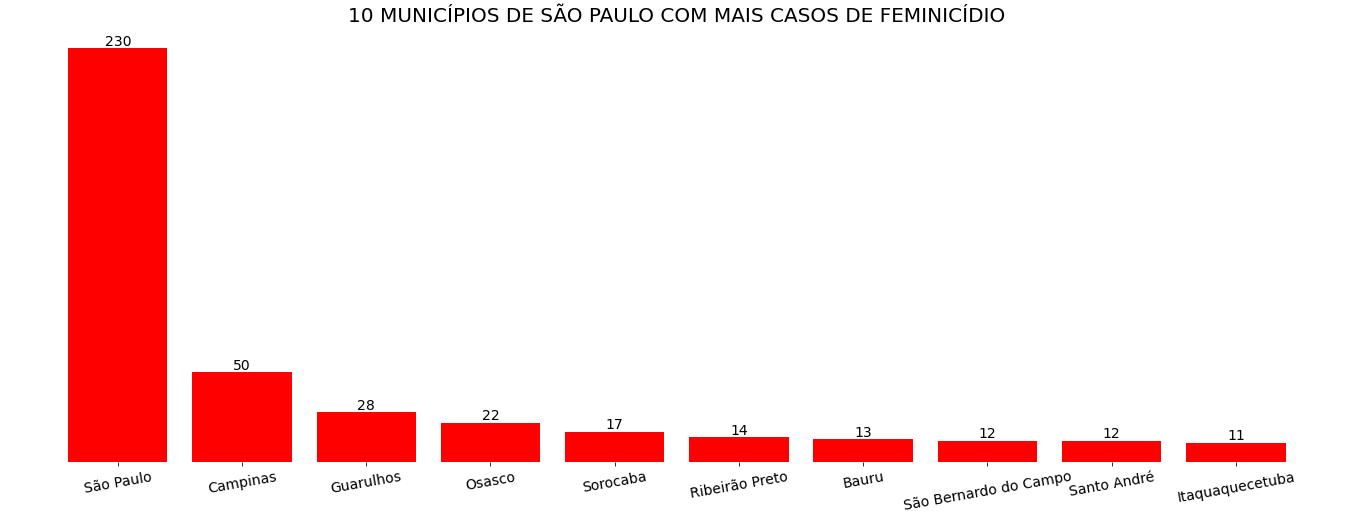

In [ ]:
fig, ax = plt.subplots(figsize=(24,8), dpi=72)

muncip = ax.bar(mun.index, mun['Nº DE VÍT HD'], color='red', width=0.8)
ax.set_title("10 MUNICÍPIOS DE SÃO PAULO COM MAIS CASOS DE FEMINICÍDIO", fontsize=20)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.spines[:].set_visible(False)
ax.tick_params(axis='x', labelrotation = 10)
ax.bar_label(muncip, fmt='%.f', fontsize=14)

plt.show()

In [ ]:
mun['Nº DE VÍT HD']/1047*100

MUNICIPIO_CIRCUNSCRICAO
São Paulo                21.967526
Campinas                  4.775549
Guarulhos                 2.674308
Osasco                    2.101242
Sorocaba                  1.623687
Ribeirão Preto            1.337154
Bauru                     1.241643
São Bernardo do Campo     1.146132
Santo André               1.146132
Itaquaquecetuba           1.050621
Name: Nº DE VÍT HD, dtype: float64

* ## **Municípios de São Paulo com mais casos de feminicídio:**
* ### **São Paulo:** Contém **22%** dos registros.
* ### **Campinas:** Contém **4,8%** dos registros.
* ### **Guarulhos:** Contém **2,7%** dos registros
* ### **Osasco:** Contém **2,1%** dos registros.
* ### **Sorocaba:** Contém **1,6%** dos registros.



---



In [ ]:
df[:1]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
print("PROFISSÕES DIFERENTES:",df['PROFISSAO'].value_counts().shape[0])


PROFISSÕES DIFERENTES: 111


In [ ]:
proftst = df.copy()

In [ ]:
proftst['PROFISSAO'] = proftst['PROFISSAO'].str.replace('NÃO IDENTIFICADO','SEM INFO')
proftst['PROFISSAO'] = proftst['PROFISSAO'].str.replace('NAO INFORMADA','SEM INFO')
proftst['PROFISSAO'] = proftst['PROFISSAO'].str.replace('OUTROS','SEM INFO')

In [ ]:
profi = pd.DataFrame(proftst.groupby('PROFISSAO').sum().sort_values(by='Nº DE VÍT HD', ascending=False))

In [ ]:
(profi['Nº DE VÍT HD']/1047*100)[:15]

PROFISSAO
SEM INFO               45.558739
PRENDAS DOMESTICAS     10.219675
ESTUDANTE               6.781280
DESEMPREGADO(A)         2.101242
APOSENTADO(A)           2.005731
EMPREGADO DOMESTICO     1.719198
AUTONOMO(A)             1.719198
BALCONISTA              1.623687
AUXILIAR DE LIMPEZA     1.623687
DESEMPREGADO            1.623687
CABELEIREIRO(A)         1.528176
COMERCIANTE             1.337154
FAXINEIRO(A)            1.241643
VENDEDOR(A)             1.146132
COZINHEIRO(A)           1.050621
Name: Nº DE VÍT HD, dtype: float64

* ## **45,5%** da coluna **PROFISSAO** não informa a profissão das vítimas, porem vou listar as **10 profissões** seguintes para plotar o gráfico.


In [ ]:
prof = profi[:11]

In [ ]:
prof = prof.drop((prof.loc[prof.index == 'SEM INFO']).index)

In [ ]:
prof

,Nº DE VÍT HD,IDADE_PESSOA
PROFISSAO,,
PRENDAS DOMESTICAS,107,4092.0
ESTUDANTE,71,1420.0
DESEMPREGADO(A),22,640.0
APOSENTADO(A),21,1443.0
EMPREGADO DOMESTICO,18,692.0
AUTONOMO(A),18,689.0
BALCONISTA,17,564.0
AUXILIAR DE LIMPEZA,17,624.0
DESEMPREGADO,17,512.0


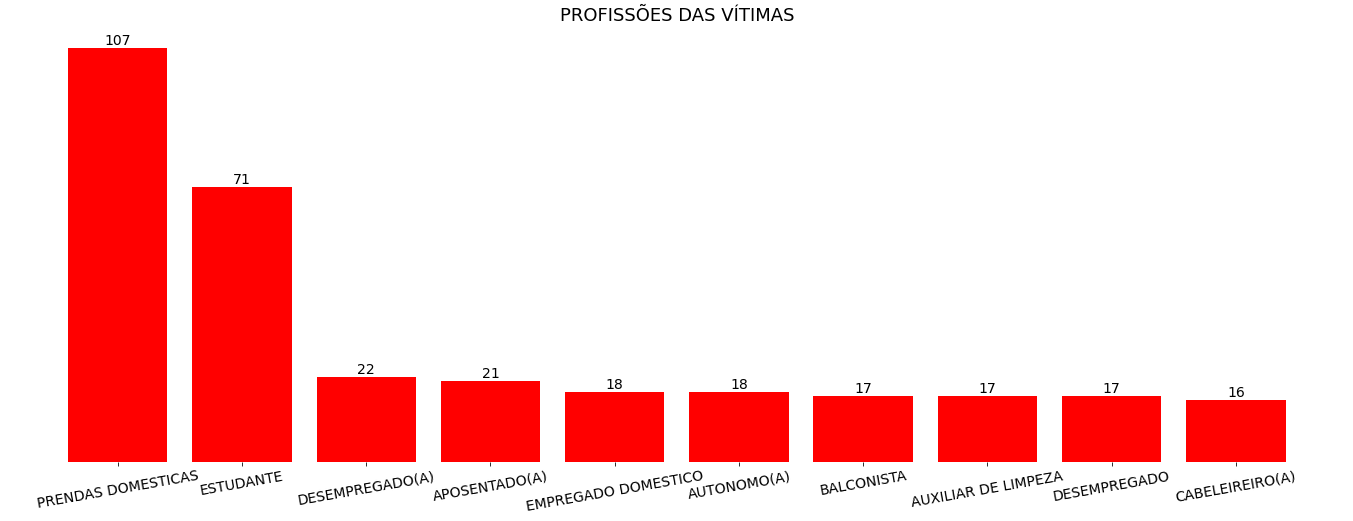

In [ ]:
fig, ax = plt.subplots(figsize=(24,8), dpi=72)

profvit = ax.bar(prof.index, prof['Nº DE VÍT HD'], color='red')
ax.set_title("PROFISSÕES DAS VÍTIMAS", fontsize=18)
ax.set_ylabel("CASOS", fontsize=16)
ax.yaxis.set_visible(False)
ax.tick_params(axis='both', labelsize=14)
ax.tick_params(axis='x', labelrotation=10)
ax.spines[:].set_visible(False)
ax.bar_label(profvit, fontsize=14)

plt.show()

In [ ]:
prof['Nº DE VÍT HD']/1047*100

PROFISSAO
PRENDAS DOMESTICAS     10.219675
ESTUDANTE               6.781280
DESEMPREGADO(A)         2.101242
APOSENTADO(A)           2.005731
EMPREGADO DOMESTICO     1.719198
AUTONOMO(A)             1.719198
BALCONISTA              1.623687
AUXILIAR DE LIMPEZA     1.623687
DESEMPREGADO            1.623687
CABELEIREIRO(A)         1.528176
Name: Nº DE VÍT HD, dtype: float64

* # **Profissões das vítimas de feminicídio:**
* ### **Prendas domésticas:** Contém **10,2%** dos registros.
* ### **Estudante:** Contém **6,8%** dos registros.
* ### **Desempregada:** Contém **2,1%** dos registros.
* ### **Aposentada:** Contém **2%** dos registros.
* ### **Empregada doméstica:** Contém **1,7%** dos casos.



---



In [ ]:
df[:1]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
print("Diferentes locais:",df['DESC_TIPOLOCAL'].value_counts().shape[0])
print()
df['DESC_TIPOLOCAL'].value_counts()[:10]

Diferentes locais: 19



Residência                697
Via pública               226
Comércio e serviços        22
Unidade rural              21
Area não ocupada           15
Saúde                      13
Hospedagem                 11
Rodovia/Estrada             9
Condominio Residencial      9
Restaurante e afins         6
Name: DESC_TIPOLOCAL, dtype: int64

In [ ]:
loc = df.groupby('DESC_TIPOLOCAL').sum().sort_values(by='Nº DE VÍT HD', ascending=False)

In [ ]:
local = loc[:15]

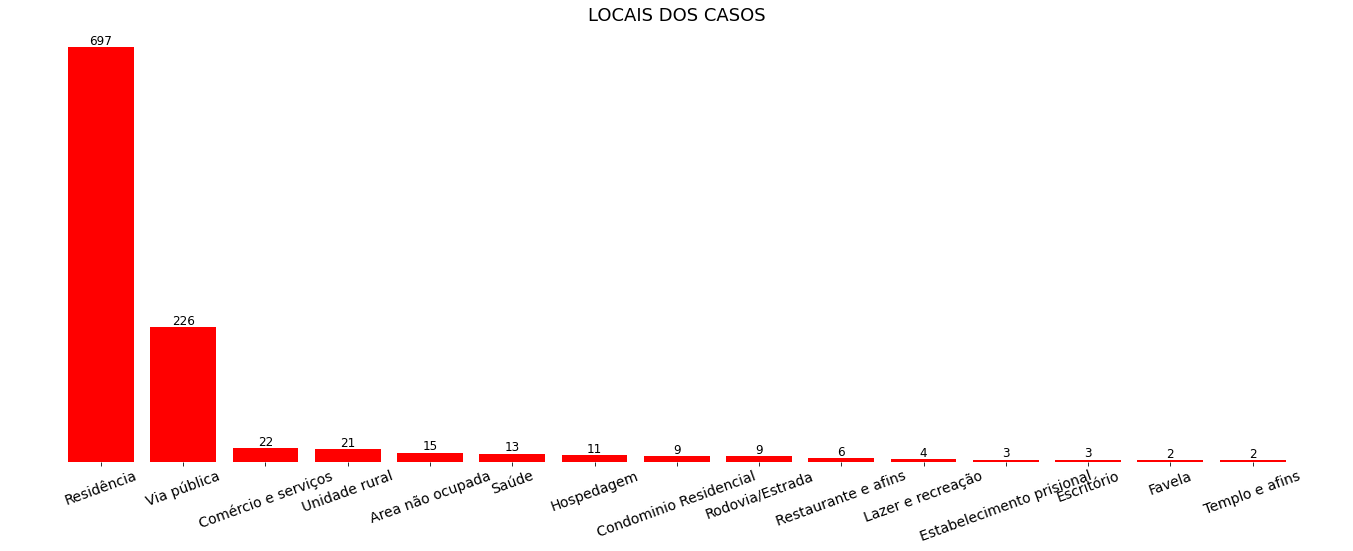

In [ ]:
fig, ax = plt.subplots(figsize=(24,8), dpi=72)

loctxt = ax.bar(local.index, local['Nº DE VÍT HD'], color='red')
ax.set_title("LOCAIS DOS CASOS", fontsize=18)
ax.set_ylabel("CASOS", fontsize=16)
ax.set_yticks(range(0,701,50))
ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='both', labelsize=14)
ax.tick_params(axis='x', labelrotation=20)
ax.bar_label(loctxt, fmt='%.f', fontsize=12)

plt.show()

In [ ]:
local['Nº DE VÍT HD']/1047*100

DESC_TIPOLOCAL
Residência                   66.571156
Via pública                  21.585482
Comércio e serviços           2.101242
Unidade rural                 2.005731
Area não ocupada              1.432665
Saúde                         1.241643
Hospedagem                    1.050621
Condominio Residencial        0.859599
Rodovia/Estrada               0.859599
Restaurante e afins           0.573066
Lazer e recreação             0.382044
Estabelecimento prisional     0.286533
Escritório                    0.286533
Favela                        0.191022
Templo e afins                0.191022
Name: Nº DE VÍT HD, dtype: float64

* ## **Locais dos casos de feminicídios:**
* ### **Residência:** Contém **66,6%** dos registros.
* ### **Via pública:** Contém **21,6%** dos registros.
* ### **Comércio e serviços:** Contém **2,1%** dos registros.
* ### **Unidade rural:** Contém **2%** dos registros.
* ### **Área não ocupada:** Contém **1,4%** dos registros.



---
* ## **Anos com mais casos:**


In [ ]:
df[:1]

,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,DATA_FATO,DESC_TIPOLOCAL,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,Itupeva,DM - Itupeva,1,2015-04-12,Templo e afins,Vítima,Feminino,44.0,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da condição de sexo feminino


In [ ]:
year = df.copy()

In [ ]:
Anos = pd.DataFrame(year.groupby(year['DATA_FATO'].dt.to_period('Y')).sum())

In [ ]:
Anos.index = Anos.index.strftime('%Y')

In [ ]:
Meses = pd.DataFrame(year.groupby(year['DATA_FATO'].dt.to_period('M')).sum())
Meses.index = Meses.index.strftime('%Y-%m')

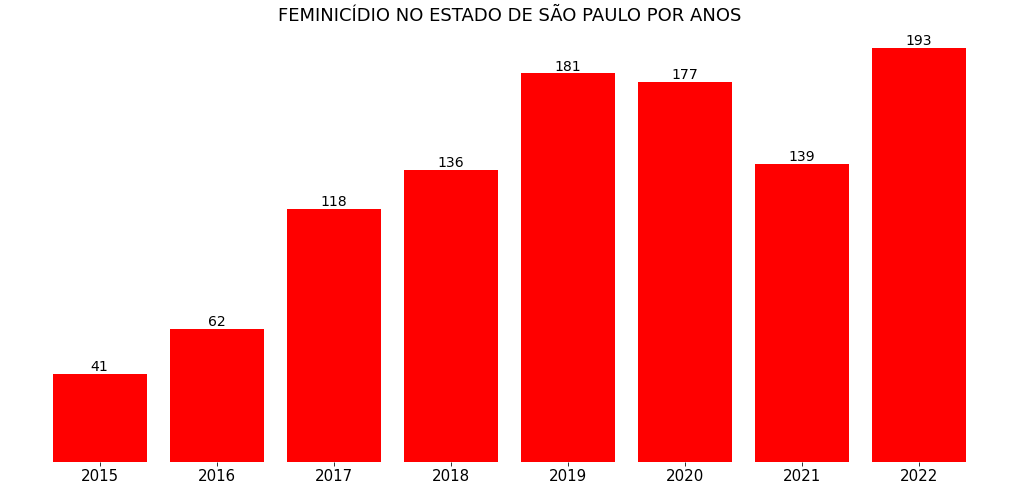

In [ ]:
fig, ax = plt.subplots(figsize=(18,8), dpi=72)

an = ax.bar(Anos.index, Anos['Nº DE VÍT HD'], color='red')
ax.set_title("FEMINICÍDIO NO ESTADO DE SÃO PAULO POR ANOS", fontsize=18)
ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='both', labelsize=15)
ax.bar_label(an, fontsize=14)

plt.show()

In [ ]:
Meses.shape[0]

93

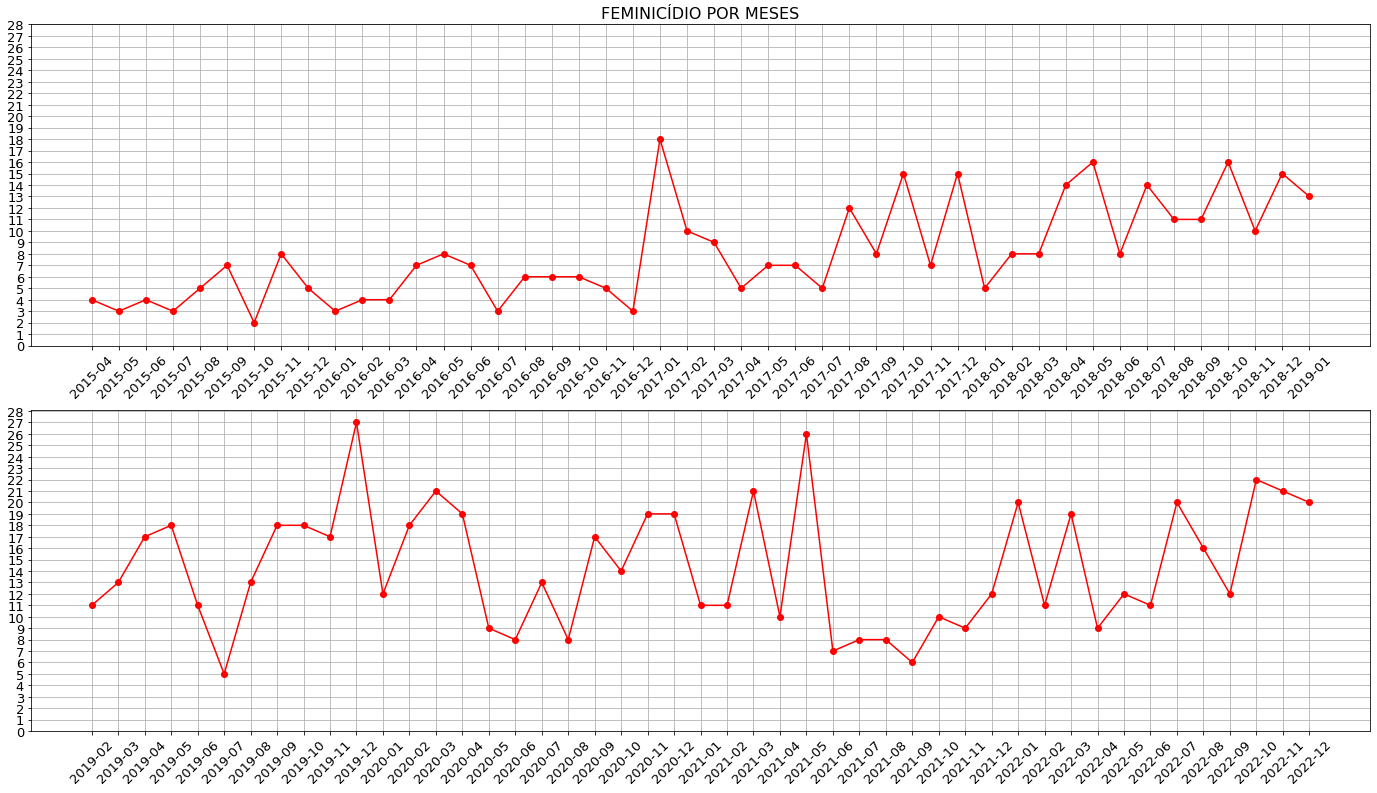

In [ ]:
fig, ax = plt.subplots(nrows=2,figsize=(24,13))
ax[0].set_title("FEMINICÍDIO POR MESES", fontsize=16)

ax[0].plot(Meses.index[:46], Meses['Nº DE VÍT HD'][:46], '-o',color='red')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].grid(True)
ax[0].set_yticks(range(0,29,1))
ax[0].tick_params(axis='both', labelsize=13)

ax[1].plot(Meses.index[46:93], Meses['Nº DE VÍT HD'][46:93], '-o', color='red')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].grid(True)
ax[1].set_yticks(range(0,29,1))
ax[1].tick_params(axis='both', labelsize=13)

plt.show()

# **Conclusões finais:**
* ### No artigo do github irei apresentar e comentar mais sobre os gráficos plotados e como os dados se corportaram em seus anos e meses, também em quais clases mais afetadas.